# Customer Churn Prediction
This project builds a machine learning model to predict whether a customer will churn based on their behavior and demographic data.

We'll go through:
1. Data loading and inspection
2. Data preprocessing and cleaning
3. Exploratory data analysis (EDA)
4. Model training and evaluation
5. Summary and key takeaways

## 1. Importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [3]:
df = pd.read_csv(r"C:\Users\hamza\Downloads\archive (5)\Customer Churn.csv")

## 2. Data Loading

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  FN                       3150 non-null   float64
 14  FP                      

In [5]:
#checking for null values
df.isnull().sum()



Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
FN                         0
FP                         0
Churn                      0
dtype: int64

In [6]:
#view the first five rows of data
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


## 3. Data Cleaning & Preprocessing

In [7]:
#Column	Explanation
#Call Failure	number of call failures
#Complaints	binary (0: No complaint, 1: complaint)
#Subscription Length	total months of subscription
#Charge Amount	ordinal attribute (0: lowest amount, 9: highest amount)
#Seconds of Use	total seconds of calls
#Frequency of use	total number of calls
#Frequency of SMS	total number of text messages
#Distinct Called Numbers	total number of distinct phone calls
#Age Group	ordinal attribute (1: younger age, 5: older age)
#Tariff Plan	binary (1: Pay as you go, 2: contractual)
#Status	binary (1: active, 2: non-active)
#Age	age of customer
#Customer Value	the calculated value of customer
#Churn	class label (1: churn, 0: non-churn)

In [8]:
categorical= ['Complains', 'Charge  Amount', 'Age Group', 'Contractual_plan', 'Status_Active', 'Churn']
numerical = ['Call  Failure' , 'Subscription  Length','Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age', 'Customer Value'] 
#converting status and tariff plan to binary variables #1 means active and 0 means inactive
df['Status_Active'] = df['Status'].map({1: 1, 2: 0})
df['Contractual_plan'] = df['Tariff Plan'].map({1:0, 2:1})
df.drop(['Status', 'Tariff Plan'], axis=1, inplace=True)

In [9]:
#drop duplicates
df.drop_duplicates(inplace=True)
#reset index
df.reset_index(drop=True , inplace=True)

#dropping FN and FP
df.drop(['FN', 'FP'],axis=1, inplace =True)

## 4. Exploratory Data Analysis (EDA)

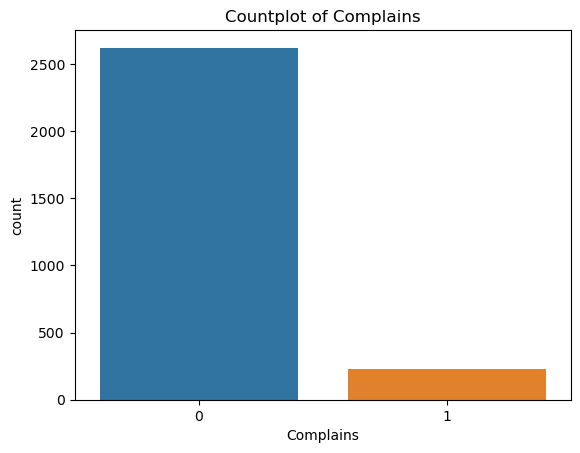

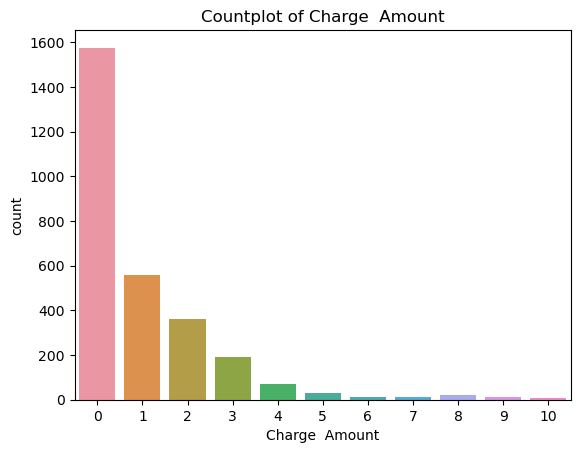

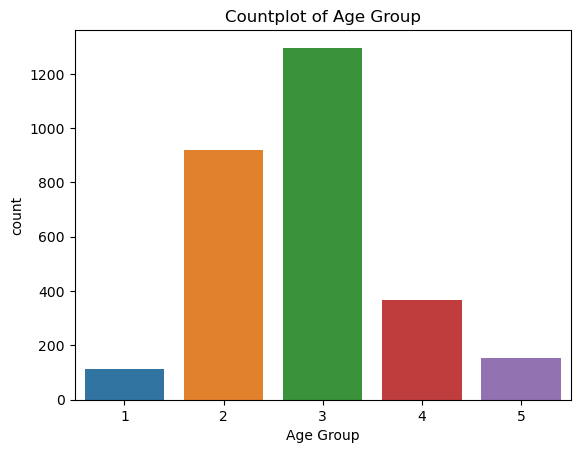

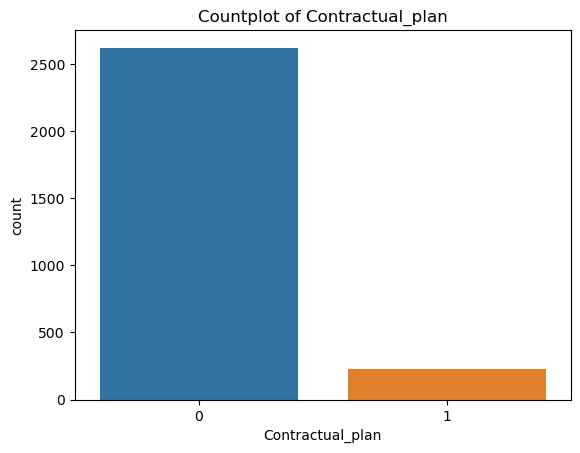

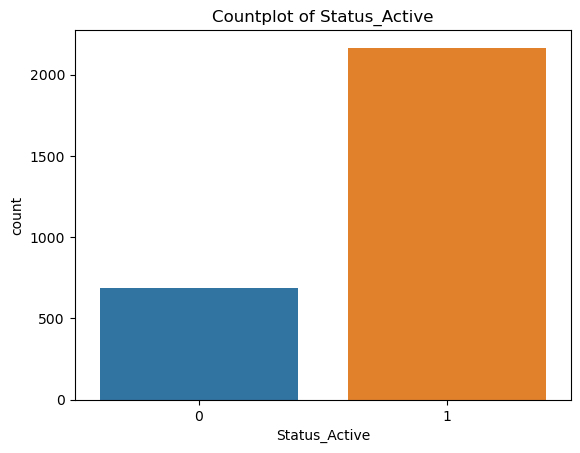

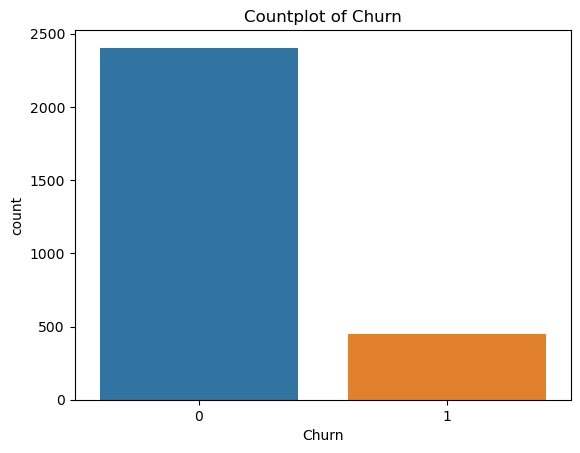

In [11]:
#Countplots for every categorical variable
for i in df[categorical].columns:
    plt.figure()
    sns.countplot(x =i , data=df)
    plt.title(f'Countplot of {i}')
    plt.xlabel(f'{i}')
    plt.ylabel('count')
    plt.show()
    

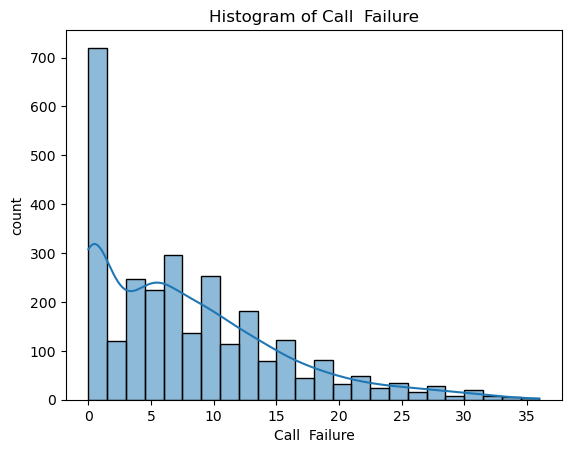

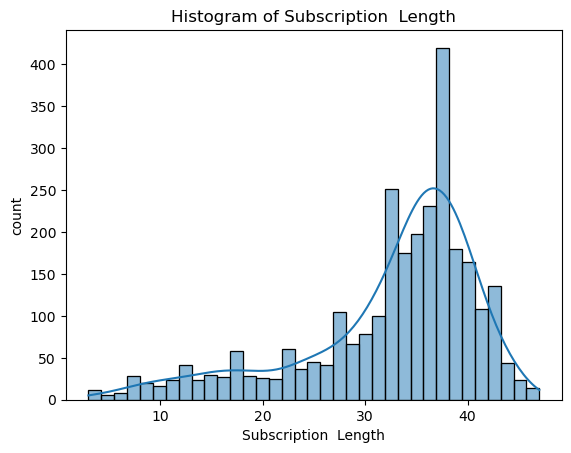

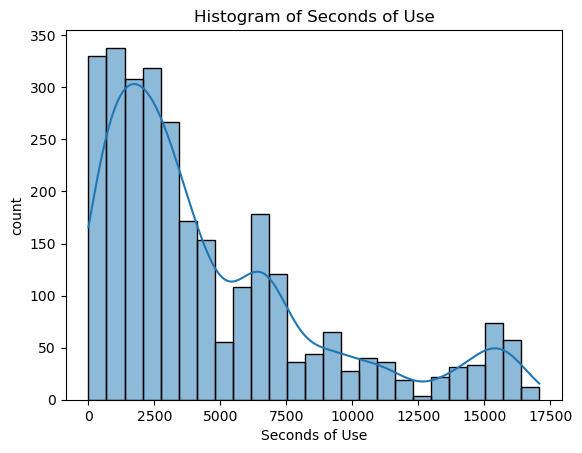

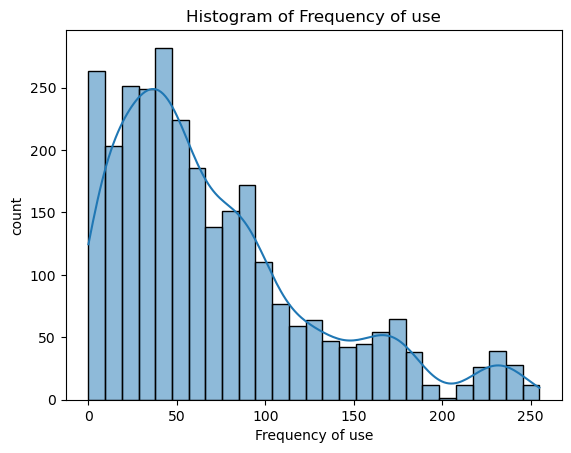

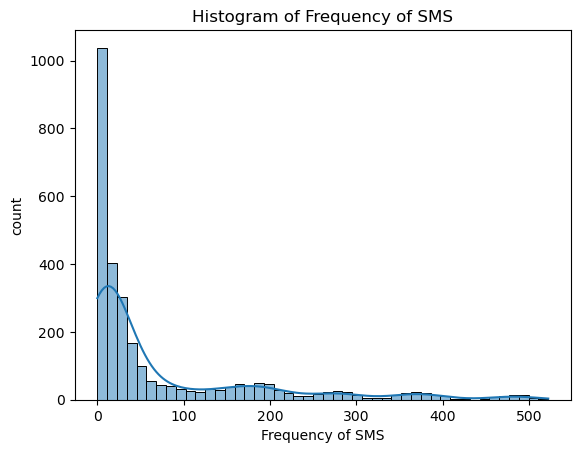

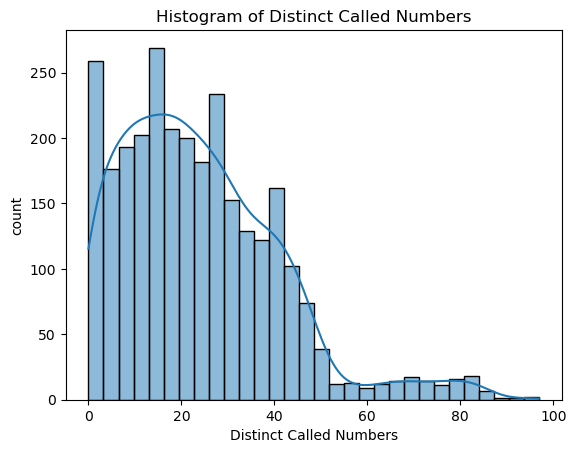

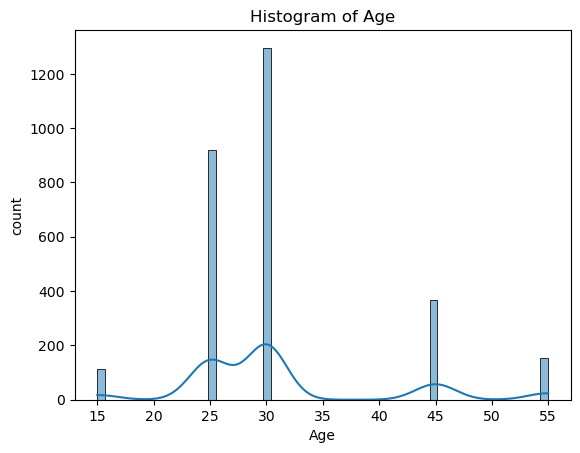

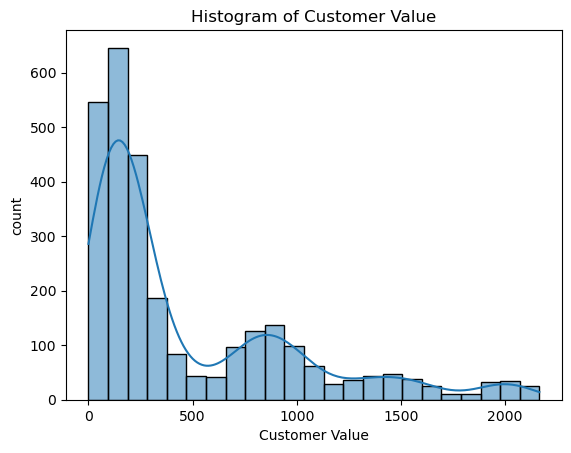

In [12]:
#histogram for every numerical variable to see the distribution
for i in df[numerical].columns:
    plt.figure()
    sns.histplot(df[i] , kde= True)
    plt.title(f'Histogram of {i}')
    plt.xlabel(f'{i}')
    plt.ylabel('count')
    plt.show()
    

In [13]:
#count duplicates
df[df.duplicated()] 

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Age,Customer Value,Churn,Status_Active,Contractual_plan


<Axes: xlabel='More SMS', ylabel='count'>

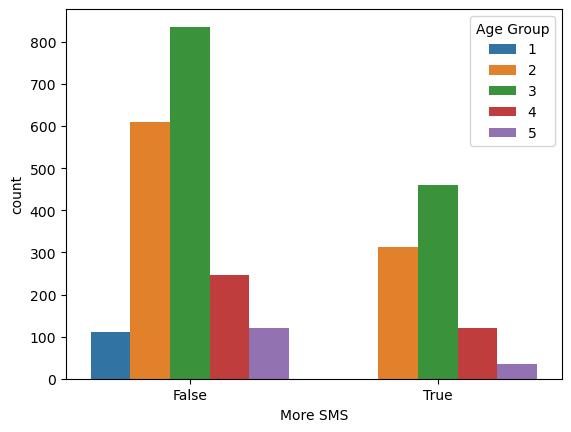

In [14]:
#🗺️ Explore: Which age groups send more SMS messages than make phone
df1=df.copy()
df1['More SMS'] = df1['Frequency of SMS'] > df1['Frequency of use']
plt.figure()
sns.countplot(data=df1, x='More SMS', hue='Age Group' )
#All groups make more calls than SMS if we count the people who make more SMS against the people who make more calls. 


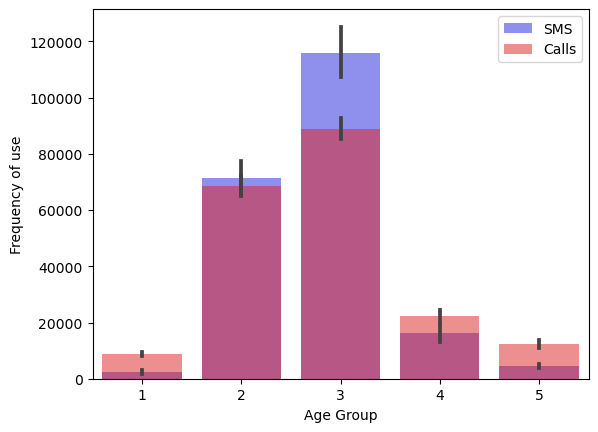

In [15]:
sns.barplot(data=df1, x='Age Group', y='Frequency of SMS', color='blue', estimator='sum', label='SMS', alpha = 0.5)
sns.barplot(data=df1, x='Age Group', y='Frequency of use', color='red', estimator='sum', label='Calls',alpha=0.5)
plt.legend()
#However, if we sum the number of SMS and calls for each group, the results are different.
#This is because, the people who send more SMS than they make calls, send a very high quantity of SMS.
#Age groups 2 and 3 send more SMS than they make calls

In [16]:
#looking at the correlation among variables
df.corr()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Age,Customer Value,Churn,Status_Active,Contractual_plan
Call Failure,1.000000,0.149564,0.177206,0.585442,0.495463,0.567096,-0.031926,0.498604,0.049340,0.043799,0.110228,0.003310,0.094090,0.187537
Complains,0.149564,1.000000,-0.019229,-0.035887,-0.108934,-0.095519,-0.114729,-0.061314,0.015761,-0.000400,-0.136989,0.546055,-0.282928,0.002461
Subscription Length,0.177206,-0.019229,1.000000,0.084275,0.127184,0.109148,0.080530,0.099215,0.030078,0.005900,0.113184,-0.037984,-0.144235,-0.160538
Charge Amount,0.585442,-0.035887,0.084275,1.000000,0.443585,0.372646,0.085781,0.413897,0.282761,0.283466,0.161852,-0.201662,0.353311,0.321193
Seconds of Use,0.495463,-0.108934,0.127184,0.443585,1.000000,0.945144,0.093073,0.671973,0.015253,0.019383,0.408536,-0.295999,0.449660,0.127793
Frequency of use,0.567096,-0.095519,0.109148,0.372646,0.945144,1.000000,0.090712,0.731204,-0.039523,-0.031574,0.394647,-0.298608,0.440601,0.199873
Frequency of SMS,-0.031926,-0.114729,0.080530,0.085781,0.093073,0.090712,1.000000,0.069717,-0.056859,-0.093235,0.922852,-0.218894,0.288049,0.193785
Distinct Called Numbers,0.498604,-0.061314,0.099215,0.413897,0.671973,0.731204,0.069717,1.000000,0.015562,0.049187,0.275447,-0.270343,0.393052,0.167037
Age Group,0.049340,0.015761,0.030078,0.282761,0.015253,-0.039523,-0.056859,0.015562,1.000000,0.960877,-0.193461,-0.005891,-0.020048,-0.153496
Age,0.043799,-0.000400,0.005900,0.283466,0.019383,-0.031574,-0.093235,0.049187,0.960877,1.000000,-0.227174,-0.011491,-0.011887,-0.120429


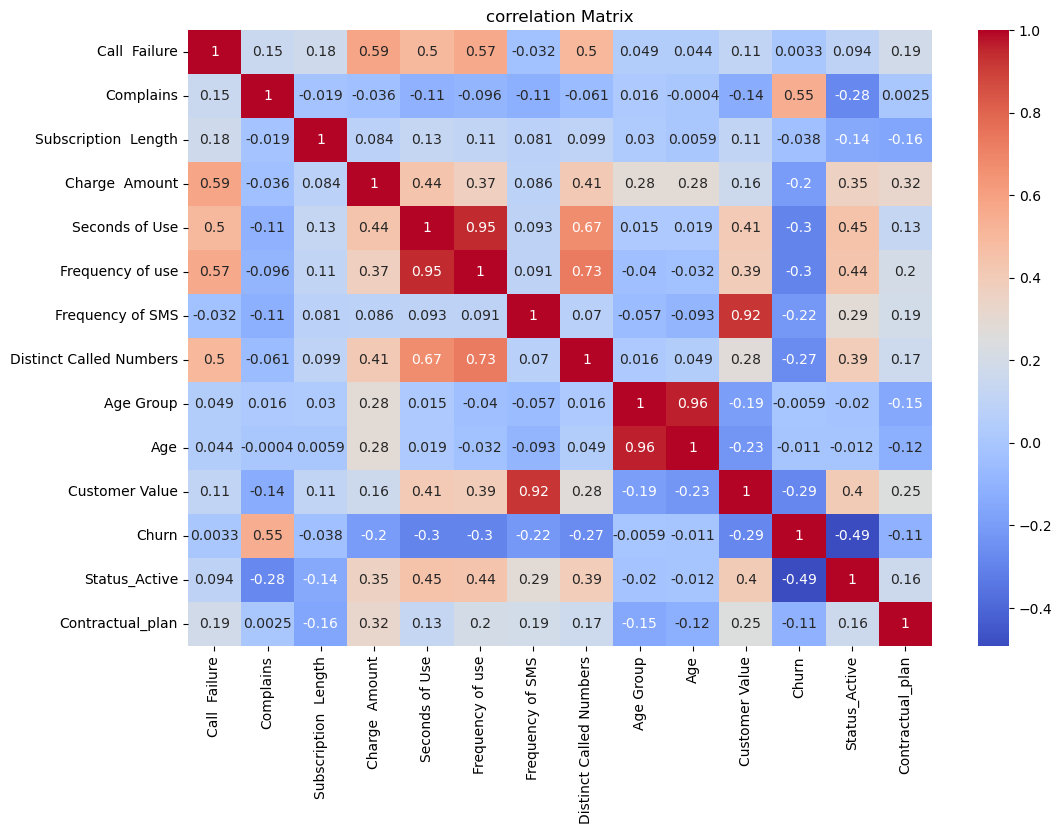

In [17]:
#visualizing the correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('correlation Matrix')
plt.show()


In [18]:
#Frequency of SMS and Cutomer value are very hgihly correlated
#Age and Age group are very highly correlated

In [19]:
#Age and Age group represent the same thing so we'll drop Age
df.drop('Age', axis=1, inplace=True)

In [20]:
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Customer Value,Churn,Status_Active,Contractual_plan
0,8,0,38,0,4370,71,5,17,3,197.640,0,1,0
1,0,0,39,0,318,5,7,4,2,46.035,0,0,0
2,10,0,37,0,2453,60,359,24,3,1536.520,0,1,0
3,10,0,38,0,4198,66,1,35,1,240.020,0,1,0
4,3,0,38,0,2393,58,2,33,1,145.805,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,17,0,17,1,9237,177,80,42,5,261.210,0,1,0
2846,13,0,18,4,3157,51,38,21,3,280.320,0,1,0
2847,8,1,11,2,1792,25,7,9,3,100.680,1,1,0
2848,26,0,38,9,10740,99,8,44,5,174.585,0,1,1


## 5. Model Training & Evaluation

In [21]:
# Now we will build a model to predict whether a customer will churn or not
#We will analyze the most important features
#The model we weill build is: Logistic Regression. 
#We will use Cross validation to determine the best hyperparameters for each model


In [22]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score , precision_score, recall_score , f1_score, roc_auc_score


# Prepare 
X = df.drop('Churn', axis=1).values
y = df['Churn'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model. Used Liblinear because it caters both L1 and L2 regularization
logreg = LogisticRegression(solver='liblinear')


# Cross-validation scores for each metric
train_accuracy = cross_val_score(logreg, X_train_scaled, y_train, cv=kf, scoring='accuracy')
train_precision = cross_val_score(logreg, X_train_scaled, y_train, cv=kf, scoring='precision')
train_recall = cross_val_score(logreg, X_train_scaled, y_train, cv=kf, scoring='recall')
train_f1 = cross_val_score(logreg, X_train_scaled, y_train, cv=kf, scoring='f1')
train_roc_auc = cross_val_score(logreg, X_train_scaled, y_train, cv=kf, scoring='roc_auc')

# Print the mean of each metric
print(f"Train Mean Accuracy: {train_accuracy.mean():.4f}")
print(f"Train Mean Precision: {train_precision.mean():.4f}")
print(f"Train Mean Recall: {train_recall.mean():.4f}")
print(f"Train Mean F1 Score: {train_f1.mean():.4f}")
print(f"Train Mean ROC AUC: {train_roc_auc.mean():.4f}")



# Fit the model on the whole training data
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_test_pred = logreg.predict(X_test_scaled)
y_test_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model on the test set using the appropriate metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# Print the test metrics
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")


Train Mean Accuracy: 0.8974
Train Mean Precision: 0.7919
Train Mean Recall: 0.4664
Train Mean F1 Score: 0.5862
Train Mean ROC AUC: 0.9346

Test Accuracy: 0.9018
Test Precision: 0.8235
Test Recall: 0.4719
Test F1 Score: 0.6000
Test ROC AUC: 0.9275


In [23]:
#logistic Regression with Hyperparameter tuning


param_grid = {'C' : np.linspace(0.1, 1, 5), "penalty" : [ 'l2', 'l1']}
logreg_CV= GridSearchCV(logreg, param_grid, cv=kf)
logreg_CV.fit(X_train_scaled, y_train)

results= logreg_CV.cv_results_
results['params']
for i in range(len(results['params'])):
    print (f"params: {results['params'][i]} --> Accuracy : {results['mean_test_score'][i]:.4f}")




params: {'C': 0.1, 'penalty': 'l2'} --> Accuracy : 0.8974
params: {'C': 0.1, 'penalty': 'l1'} --> Accuracy : 0.8991
params: {'C': 0.325, 'penalty': 'l2'} --> Accuracy : 0.8978
params: {'C': 0.325, 'penalty': 'l1'} --> Accuracy : 0.8974
params: {'C': 0.55, 'penalty': 'l2'} --> Accuracy : 0.8969
params: {'C': 0.55, 'penalty': 'l1'} --> Accuracy : 0.8978
params: {'C': 0.775, 'penalty': 'l2'} --> Accuracy : 0.8974
params: {'C': 0.775, 'penalty': 'l1'} --> Accuracy : 0.8969
params: {'C': 1.0, 'penalty': 'l2'} --> Accuracy : 0.8974
params: {'C': 1.0, 'penalty': 'l1'} --> Accuracy : 0.8982


In [24]:
#When comparing the cross-validation accuracy of a simple Logistic Regression model with a model that has undergone hyperparameter tuning, we observe a slight improvement in performance after tuning.
#So we use it for predictions on the test set

In [25]:

# Use best model
best_logreg = logreg_CV.best_estimator_

# Predict on test set
y_pred = best_logreg.predict(X_test_scaled)
y_prob = best_logreg.predict_proba(X_test_scaled)[:, 1]  # For ROC AUC

# Evaluate metrics
print("Test Set Evaluation Using Best Model:")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC  : {roc_auc_score(y_test, y_prob):.4f}")

Test Set Evaluation Using Best Model:
Accuracy : 0.9140
Precision: 0.9167
Recall   : 0.4944
F1 Score : 0.6423
ROC AUC  : 0.9282


## Metrics Analysis
The model excels with 91.67% precision and 92.82% ROC AUC, making it highly effective at accurately identifying customers who are at risk or engaged. This ensures businesses can focus their resources on the right targets.

However, the 49.44% recall suggests that nearly half of the actual at-risk customers may be missed, which could result in missed opportunities for retention.

Strengths: High precision and ROC AUC allow businesses to effectively target customers likely to churn or engage.
Opportunity: Improving recall could capture more at-risk customers, enhancing retention efforts. Techniques like Random Forest or Neural Networks may help improve recall.

In summary, the model is highly effective, and improving recall would make it even more valuable for targeted customer engagement.

In [26]:
feature_names = df.drop('Churn', axis=1).columns
coefficients = best_logreg.coef_[0]  # coefficients for the logistic regression

#DataFrame to visualize
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)
}).sort_values(by='Odds Ratio', ascending=False)

print(coef_df)

                    Feature  Coefficient  Odds Ratio
1                 Complains     0.927705    2.528699
0             Call  Failure     0.478654    1.613900
4            Seconds of Use     0.000000    1.000000
9            Customer Value     0.000000    1.000000
8                 Age Group    -0.002852    0.997152
11         Contractual_plan    -0.007227    0.992799
2      Subscription  Length    -0.153177    0.857978
3            Charge  Amount    -0.358708    0.698578
7   Distinct Called Numbers    -0.372055    0.689316
10            Status_Active    -0.503907    0.604166
6          Frequency of SMS    -0.709753    0.491766
5          Frequency of use    -0.852508    0.426345


In [27]:
# The final model outperforms the original logistic regression model on the test set.
# The improvement is due to L1 regularization, which penalizes large coefficients.
# L1 regularization forces some coefficients to zero, effectively eliminating less important features.
# It helps mitigate the impact of correlated variables by reducing redundancy, improving model generalization.
# We can see that complains and Call failures that increase the porbability of a customer churning. 

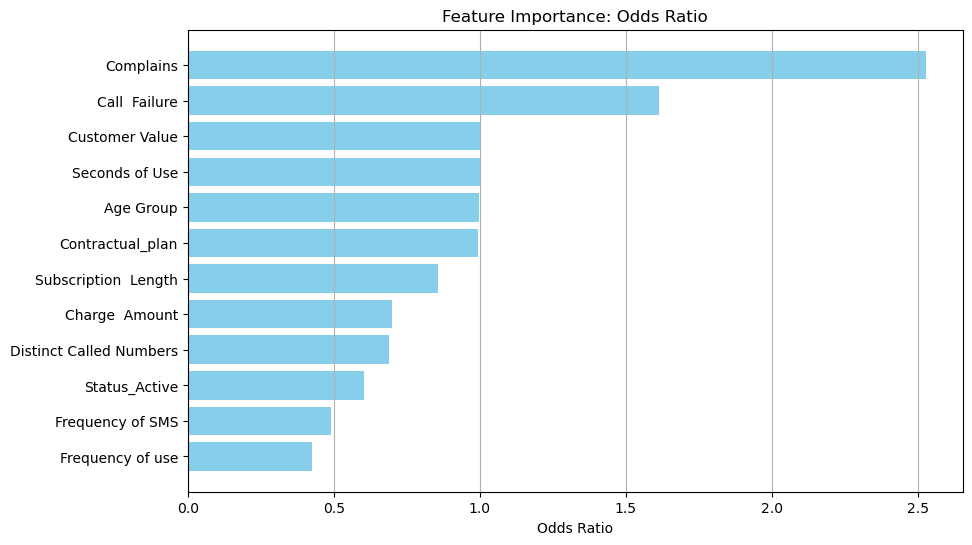

In [28]:
df_sorted= coef_df.sort_values('Odds Ratio')
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Feature'], df_sorted['Odds Ratio'], color='skyblue')
plt.xlabel('Odds Ratio')
plt.title('Feature Importance: Odds Ratio')
plt.grid(True, axis='x')
plt.show()

# Coefficient Analysis:

### Top Churn Indicators
Complaints have the highest positive coefficient (odds ratio ≈ 2.53), meaning customers who complain are over 2.5× more likely to churn.

Call failures also increase churn risk (odds ratio ≈ 1.61). An increase of 7.23 Call failures (1 Standard Deviation) reuslts in a 61% higher chance that a customer will churn.

### Top retention indicators:

Higher frequency of use and SMS, more distinct numbers called, and active status all have strong negative coefficients — suggesting engaged customers are less likely to churn.

Longer subscription length and higher charges also reduce churn odds.

### Neutral impact:

Seconds of use and customer value had no meaningful influence (coefficient ≈ 0). 

## 6. Conclusion

This model can help businesses understand which customers are at risk of leaving. The model has a high precision of 0.92 which makes it especially useful for companies with a limited budget. It ensures that most customers flagged as "likely to churn" actually will churn So the company can focus retention efforts on the right customers